In [44]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [45]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import keras_tuner as kt
from keras_tuner import BayesianOptimization

print(tf.__version__)

2.3.0


In [46]:
dataframe = pd.read_csv('SmallOffice_Composite_Results.csv', delimiter=',')       # load dataset
mName = "SmallOffice_C0_C1_C4_Composite"
dataset = dataframe.copy()

In [47]:
dataset=dataset[['@@WallU@@','@@RoofU@@','@@RoofAbp@@','@@WinU@@','@@WinSHGC@@','@@LPD@@','@@COP@@','c0: Heating', 'c1: Cooling', 'c4: Fans']]
#interiorLighting = dataset.drop( 'c2: Interior Lighting', axis='columns', inplace=True)
#print(dataset)

#exit()
dataset.describe()

,@@WallU@@,@@RoofU@@,@@RoofAbp@@,@@WinU@@,@@WinSHGC@@,@@LPD@@,@@COP@@,c0: Heating,c1: Cooling,c4: Fans
count,27000.000000,27000.000000,27000.000000,27000.00000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,1.800000,1.800000,0.500000,3.50000,0.425000,9.000000,4.000000,1686.882877,114085.794793,3074.782592
std,1.131392,1.131392,0.163302,1.41424,0.256179,4.472219,1.224768,1462.924768,47833.270349,840.836666
min,0.200000,0.200000,0.300000,1.50000,0.050000,3.000000,2.500000,0.000000,26230.460000,841.920000
25%,1.000000,1.000000,0.300000,2.50000,0.200000,6.000000,2.500000,622.325000,77781.482500,2432.655000
50%,1.800000,1.800000,0.500000,3.50000,0.425000,9.000000,4.000000,1317.230000,102826.085000,3048.735000
75%,2.600000,2.600000,0.700000,4.50000,0.650000,12.000000,5.500000,2328.965000,141815.292500,3711.845000
max,3.400000,3.400000,0.700000,5.50000,0.800000,15.000000,5.500000,11782.350000,270927.500000,5349.810000


In [48]:
train_dataset = dataset.sample(frac=0.7, random_state=7)
test_dataset = dataset.drop(train_dataset.index)

In [49]:
train_features = train_dataset[['@@WallU@@','@@RoofU@@','@@RoofAbp@@','@@WinU@@','@@WinSHGC@@','@@LPD@@','@@COP@@']]
test_features = test_dataset[['@@WallU@@','@@RoofU@@','@@RoofAbp@@','@@WinU@@','@@WinSHGC@@','@@LPD@@','@@COP@@']]

In [50]:
train_labels = train_dataset[['c0: Heating']]
test_labels = test_dataset[['c0: Heating']]

In [52]:
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
@@WallU@@,18900.0,1.804106,1.128081,0.20,1.0,1.8,2.60,3.4
@@RoofU@@,18900.0,1.808466,1.131938,0.20,1.0,1.8,2.60,3.4
@@RoofAbp@@,18900.0,0.500635,0.163717,0.30,0.3,0.5,0.70,0.7
@@WinU@@,18900.0,3.496349,1.417703,1.50,2.5,3.5,4.50,5.5
@@WinSHGC@@,18900.0,0.425238,0.255608,0.05,0.2,0.5,0.65,0.8
@@LPD@@,18900.0,8.996825,4.473200,3.00,7.0,7.0,15.00,15.0
@@COP@@,18900.0,3.992857,1.226699,2.50,2.5,4.0,5.50,5.5


In [53]:
 train_features

,@@WallU@@,@@RoofU@@,@@RoofAbp@@,@@WinU@@,@@WinSHGC@@,@@LPD@@,@@COP@@
5992,1.0,0.2,0.5,4.5,0.20,7,4.0
15539,1.8,3.4,0.5,1.5,0.65,15,5.5
25619,3.4,2.6,0.7,1.5,0.65,15,5.5
22110,3.4,0.2,0.5,3.5,0.05,11,2.5
16668,2.6,0.2,0.5,2.5,0.50,3,2.5
...,...,...,...,...,...,...,...
728,0.2,0.2,0.7,1.5,0.05,11,5.5
1170,0.2,1.0,0.3,2.5,0.20,11,2.5
5133,0.2,3.4,0.7,2.5,0.20,15,2.5
16676,2.6,0.2,0.5,2.5,0.50,11,5.5


## Normalization

In [10]:
# normalizer = preprocessing.Normalization()
# normalizer.adapt(np.array(train_features))
# print(normalizer.mean.numpy())



[1.804 1.808 0.501 3.496 0.425 8.997 3.993]


In [23]:
# d=normalizer(test_features)

In [36]:
# normalizer = preprocessing.Normalization()
# normalizer.adapt(np.array(train_features))

# train_features_scaled = pd.DataFrame(
#       normalizer(train_features).numpy(),
#       columns=train_features.columns)

# test_features_scaled = pd.DataFrame(
#       normalizer(test_features).numpy(),
#       columns=test_features.columns)

In [37]:
# train_features_scaled

,@@WallU@@,@@RoofU@@,@@RoofAbp@@,@@WinU@@,@@WinSHGC@@,@@LPD@@,@@COP@@
0,-0.712828,-1.421022,-0.003878,0.707960,-0.881208,-0.446409,0.005823
1,-0.003640,1.406064,-0.003878,-1.408195,0.879345,1.342067,1.228649
2,1.414736,0.699292,1.217777,-1.408195,0.879345,1.342067,1.228649
3,1.414736,-1.421022,-0.003878,0.002575,-1.468060,0.447829,-1.217003
4,0.705548,-1.421022,-0.003878,-0.702810,0.292494,-1.340648,-1.217003
...,...,...,...,...,...,...,...
18895,-1.422015,-1.421022,1.217777,-1.408195,-1.468060,0.447829,1.228649
18896,-1.422015,-0.714250,-1.225533,-0.702810,-0.881208,0.447829,-1.217003
18897,-1.422015,1.406064,1.217777,-0.702810,-0.881208,1.342067,-1.217003
18898,0.705548,-1.421022,-0.003878,-0.702810,0.292494,0.447829,1.228649


### Scaling

In [54]:
Minmax_scaler = MinMaxScaler()
train_features_scaled = pd.DataFrame(
      Minmax_scaler.fit_transform(train_features),
      columns=train_features.columns)

test_features_scaled = pd.DataFrame(
      Minmax_scaler.transform(test_features),
      columns = test_features.columns)


In [55]:
train_features_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
@@WallU@@,18900.0,0.501283,0.352525,0.0,0.250000,0.500000,0.75,1.0
@@RoofU@@,18900.0,0.502646,0.353731,0.0,0.250000,0.500000,0.75,1.0
@@RoofAbp@@,18900.0,0.501587,0.409292,0.0,0.000000,0.500000,1.00,1.0
@@WinU@@,18900.0,0.499087,0.354426,0.0,0.250000,0.500000,0.75,1.0
@@WinSHGC@@,18900.0,0.500317,0.340811,0.0,0.200000,0.600000,0.80,1.0
@@LPD@@,18900.0,0.499735,0.372767,0.0,0.333333,0.333333,1.00,1.0
@@COP@@,18900.0,0.497619,0.408900,0.0,0.000000,0.500000,1.00,1.0


In [56]:
train_features_scaled

,@@WallU@@,@@RoofU@@,@@RoofAbp@@,@@WinU@@,@@WinSHGC@@,@@LPD@@,@@COP@@
0,0.25,0.00,0.5,0.75,0.2,0.333333,0.5
1,0.50,1.00,0.5,0.00,0.8,1.000000,1.0
2,1.00,0.75,1.0,0.00,0.8,1.000000,1.0
3,1.00,0.00,0.5,0.50,0.0,0.666667,0.0
4,0.75,0.00,0.5,0.25,0.6,0.000000,0.0
...,...,...,...,...,...,...,...
18895,0.00,0.00,1.0,0.00,0.0,0.666667,1.0
18896,0.00,0.25,0.0,0.25,0.2,0.666667,0.0
18897,0.00,1.00,1.0,0.25,0.2,1.000000,0.0
18898,0.75,0.00,0.5,0.25,0.6,0.666667,1.0


In [13]:
# def scale_datasets(train_features,test_features):
    
#     standard_scaler = StandardScaler()
#     train_features_scaled = pd.DataFrame(
#       standard_scaler.fit_transform(train_features),
#       columns=train_features.columns
#   )
#     test_features_scaled = pd.DataFrame(
#       standard_scaler.transform(test_features),
#       columns = test_features.columns
#   )
#     return train_features_scaled, test_features_scaled

# # scale the dataset
# train_features_scaled, test_features_scaled = scale_datasets(train_features,test_features)

## DNN

### Hypertuning

In [58]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [59]:
tuner = BayesianOptimization(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=10,
    executions_per_trial=3,
    directory='AmanECBC',
    project_name='ECBC Tuned_co_heating-MinMaxScaler_v3')

In [60]:
tuner.search_space_summary()


Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [61]:
tuner.search(train_features_scaled,train_labels,
             epochs=100,
             validation_data=(test_features_scaled,test_labels))

Trial 10 Complete [00h 08m 37s]
val_mean_absolute_error: 10.596168835957846

Best val_mean_absolute_error So Far: 8.7034862836202
Total elapsed time: 00h 52m 06s
INFO:tensorflow:Oracle triggered exit


In [62]:
tuner.results_summary()

Results summary
Results in AmanECBC\ECBC Tuned_co_heating-MinMaxScaler_v3
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 512
units_1: 32
learning_rate: 0.01
units_2: 512
units_3: 32
units_4: 512
units_5: 288
units_6: 288
units_7: 512
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 288
Score: 8.7034862836202
Trial summary
Hyperparameters:
num_layers: 2
units_0: 512
units_1: 32
learning_rate: 0.01
units_2: 512
units_3: 256
units_4: 512
units_5: 448
Score: 8.892568747202555
Trial summary
Hyperparameters:
num_layers: 2
units_0: 512
units_1: 32
learning_rate: 0.01
units_2: 512
units_3: 32
units_4: 64
units_5: 416
units_6: 96
units_7: 96
units_8: 96
units_9: 256
units_10: 64
units_11: 224
units_12: 96
Score: 9.100808143615723
Trial summary
Hyperparameters:
num_layers: 2
units_0: 512
units_1: 32
learning_rate: 0.01
units_2: 512
units_3: 32
units_4: 416
units_5: 320
units_6: 32
units_7: 32
unit

#### Build Model with best parameters

In [35]:
# def build_and_compile_model():
#   model = tf.keras.models.Sequential([
#       layers.Dense(352, activation='relu'),
#       layers.Dense(224, activation='relu'),
#       layers.Dense(32, activation='relu'),
#       layers.Dense(1)
#   ])

#   model.compile(loss='mean_absolute_error',
#                 optimizer=tf.keras.optimizers.Adam(0.01))
#   return model

In [63]:
dnn_model = tuner.get_best_models()[0]
dnn_model.build(train_features_scaled.shape)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (18900, 512)              4096      
_________________________________________________________________
dense_1 (Dense)              (18900, 32)               16416     
_________________________________________________________________
dense_2 (Dense)              (18900, 1)                33        
Total params: 20,545
Trainable params: 20,545
Non-trainable params: 0
_________________________________________________________________


In [64]:
%%time
history = dnn_model.fit(
    train_features_scaled, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Wall time: 30.4 s


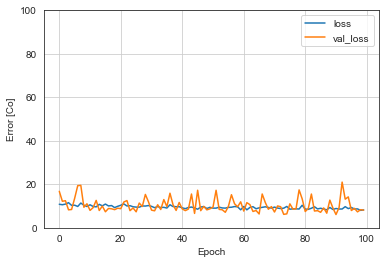

In [109]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Co]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


In [112]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'acc'

In [66]:
test_results={}
test_results['dnn_model'] = dnn_model.evaluate(test_features_scaled, test_labels, verbose=0)[0]

In [67]:
pd.DataFrame(test_results, index=['Mean absolute error [Co]']).T

,Mean absolute error [Co]
dnn_model,7.937893


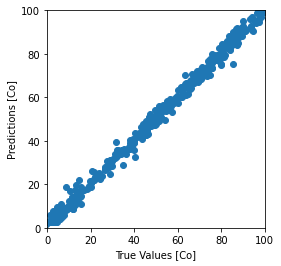

In [68]:
test_predictions = dnn_model.predict(test_features_scaled).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Co]')
plt.ylabel('Predictions [Co]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

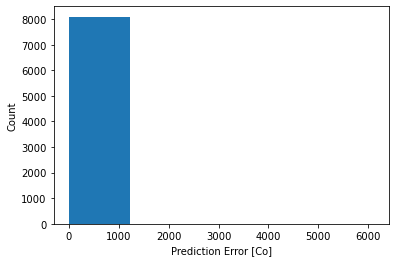

In [92]:
plt.hist(errors, bins=5)
plt.xlabel('Prediction Error [Co]')
_ = plt.ylabel('Count')

In [69]:
e=test_predictions.tolist()
e

[226.1593475341797,
 138.8547821044922,
 84.35031127929688,
 79.54960632324219,
 14.433865547180176,
 48.986053466796875,
 14.360036849975586,
 8.624608039855957,
 5.02583122253418,
 5.961575508117676,
 6.046622276306152,
 21.801637649536133,
 2.4804203510284424,
 2.4804203510284424,
 2.4804203510284424,
 2.4804203510284424,
 2.4804203510284424,
 2.4804203510284424,
 1025.222900390625,
 757.9803466796875,
 636.5384521484375,
 467.420166015625,
 295.0014953613281,
 520.6994018554688,
 299.15264892578125,
 190.2239227294922,
 124.05664825439453,
 131.05665588378906,
 45.011314392089844,
 59.30606460571289,
 78.68013000488281,
 12.690096855163574,
 43.78830337524414,
 31.444509506225586,
 17.257295608520508,
 11.7154541015625,
 17.538747787475586,
 11.134203910827637,
 16.43360137939453,
 8.666216850280762,
 4.076725006103516,
 3.7184438705444336,
 2660.53759765625,
 1140.333740234375,
 944.3367919921875,
 1060.3045654296875,
 686.0924072265625,
 216.59451293945312,
 325.1188659667969,
 6

In [80]:
pdToList = list(test_labels["c0: Heating"])
errors=[]
zip_object = zip(pdToList,e)
for list1_i, list2_i in zip_object:
    errors.append((abs(list1_i-list2_i)/list1_i)*100)
                  

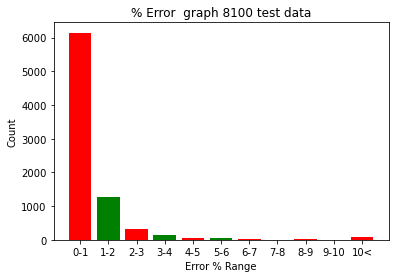

[6145, 1257, 324, 148, 64, 43, 18, 7, 11, 8, 75]


In [94]:
# to distribute error% in ranges

error_dist=[]

for i in errors:
    if 0<=i<1:
        error_dist.append("0-1")
    elif 1<=i<2:
        error_dist.append("1-2")
    elif 2<=i<3:
        error_dist.append("2-3")  
    elif 3<=i<4:
        error_dist.append("3-4")
    elif 4<=i<5:
        error_dist.append("4-5")
    elif 5<=i<6:
        error_dist.append("5-6")
    elif 6<=i<7:
        error_dist.append("6-7")
    elif 7<=i<8:
        error_dist.append("7-8")
    elif 8<=i<9:
        error_dist.append("8-9")
    elif 9<=i<=10:
        error_dist.append("9-10")
    else:
        error_dist.append("10<")
        



# to count the number of occurrences
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count


 
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5,6,7,8,9,10,11]
 
# heights of bars
height = [countX(error_dist,"0-1"), countX(error_dist,"1-2"), countX(error_dist,"2-3"), countX(error_dist,"3-4"),countX(error_dist,"4-5"),countX(error_dist,"5-6"),countX(error_dist,"6-7"),countX(error_dist,"7-8"),countX(error_dist,"8-9"),countX(error_dist,"9-10"),countX(error_dist,"10<")]
 
# labels for bars
tick_label = ['0-1', '1-2', '2-3', '3-4', '4-5','5-6','6-7','7-8','8-9','9-10','10<']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width =0.8, color = ['red', 'green'])
# naming the x-axis
plt.xlabel('Error % Range')
# naming the y-axis
plt.ylabel('Count')
# plot title
plt.title('% Error  graph 8100 test data')
 
# function to show the plot
plt.show()
print(height)

C:\Users\abbas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


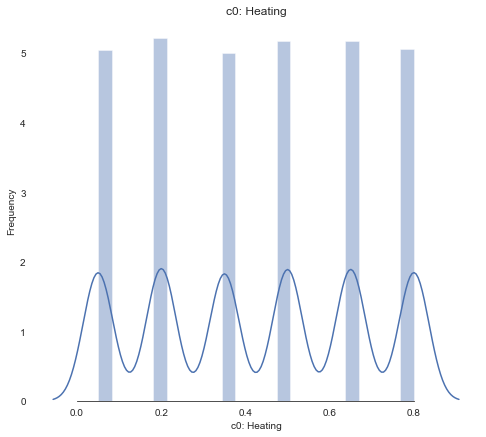

In [103]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_features['@@WinSHGC@@'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="c0: Heating")
ax.set(title="c0: Heating")
sns.despine(trim=True, left=True)
plt.show()

C:\Users\abbas\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


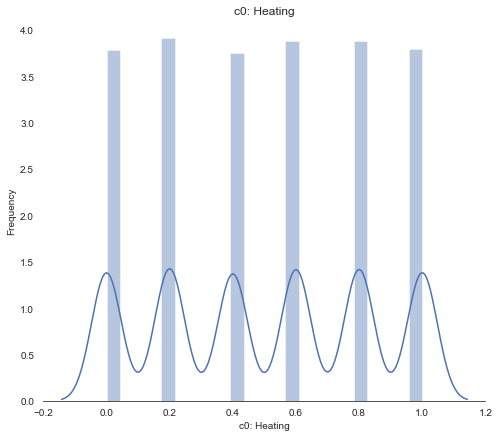

In [104]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_features_scaled['@@WinSHGC@@'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="c0: Heating")
ax.set(title="c0: Heating")
sns.despine(trim=True, left=True)
plt.show()

In [108]:
data = pd.concat([train_features['c0: Heating'], train_features['@@RoofU@@']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['@@RoofU@@'], y="c0: Heating", data=data)
fig.axis(ymin=0, ymax=8);

NameError: name 'train' is not defined

## Reload Model to check % error

In [20]:
dnn_model = tf.keras.models.load_model('ECBC_Tuned_v2/')
test_predictions = dnn_model.predict(test_features_scaled).flatten()
e=test_predictions.tolist()
pdToList = list(test_labels["c0: Heating"])
errors=[]
zip_object = zip(pdToList,e)
for list1_i, list2_i in zip_object:
    errors.append(((list1_i-list2_i)/list1_i)*100)


In [25]:
min(errors)

-1231.758379936218

In [27]:
errors.index(-1231.758379936218)

135

In [28]:
print(e[135],pdToList[135])

0.6658791899681091 0.05


## Farthest Error

In [1]:
Abs_error=[x*(-1) if x<0 else x for x in error]
max(Abs_error)


NameError: name 'error' is not defined

## Checking with Random Data

In [152]:
SR1_random= pd.read_csv('Random_SR1-1.csv')
df1 = SR1_random.copy()

df1_scaled = pd.DataFrame(
      standard_scaler.transform(df1),
      columns = df1.columns)

# Predicting Co
Co_df1=dnn_model.predict(df1_scaled)

roundedCo = [float(np.round(x,decimals=2)) for x in Co_df1]
df1['Co'] = roundedCo
df1


,Ao/A1,L/Dh,θ,Co
0,0.1,0.025,5,0.46
1,0.1,0.026,10,0.44
2,0.1,0.600,155,0.38
3,0.2,0.026,7,0.41
4,0.2,0.027,175,0.42
5,0.2,0.025,60,0.34
6,0.9,0.025,100,0.07
7,0.9,0.500,0,0.09
8,0.9,0.600,155,0.08


In [154]:
A = [float(np.round(x,decimals=3)) for x in np.random.uniform(low=0.100, high=0.90, size=(100,))]
L=[float(np.round(x,decimals=3)) for x in np.random.uniform(low=0.025, high=0.60, size=(100,))]
theta= [float(np.round(x,decimals=2)) for x in np.random.uniform(low=0, high=180, size=(100,))]

# initialise data of lists.
data = {'Ao/A1':A,
        'L/Dh':L,'θ':theta}

# Create DataFrame
df2 = pd.DataFrame(data)

# Predicting Co
df2_scaled = pd.DataFrame(
      standard_scaler.transform(df2),
      columns = df2.columns)

Co_df2=dnn_model.predict(df2_scaled)

roundedCo = [float(np.round(x,decimals=2)) for x in Co_df2]
df2['Co'] = roundedCo
df2


,Ao/A1,L/Dh,θ,Co
0,0.414,0.371,162.08,0.30
1,0.614,0.556,41.61,0.06
2,0.489,0.163,144.36,0.23
3,0.815,0.361,162.14,0.09
4,0.897,0.592,170.27,0.08
...,...,...,...,...
95,0.369,0.313,172.06,0.34
96,0.470,0.370,37.57,0.10
97,0.360,0.404,100.57,0.18
98,0.456,0.367,149.18,0.25


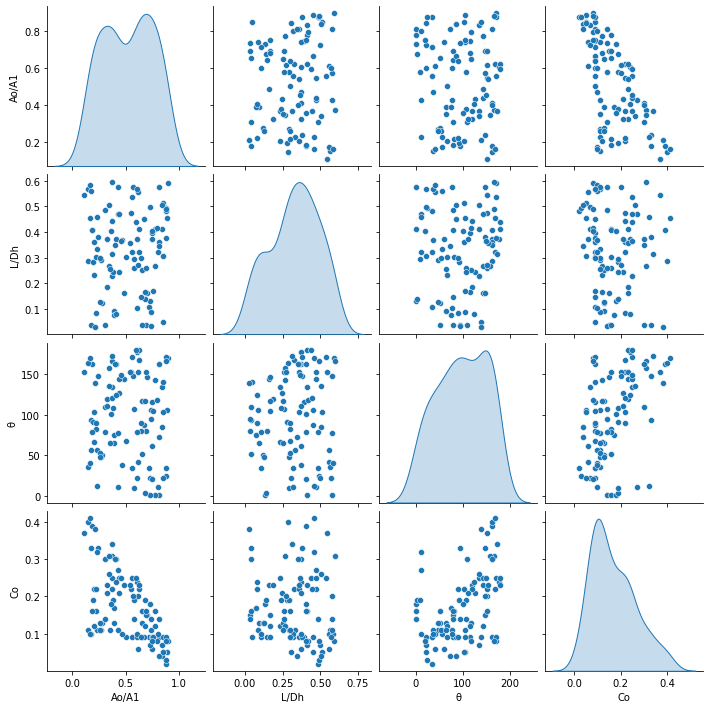

In [155]:
sns.pairplot(df2[['Ao/A1', 'L/Dh', 'θ','Co']], diag_kind='kde')

## Save Model

In [105]:
# Save the entire model as a SavedModel.

dnn_model.save('ECBC Tuned_co_heating-MinMaxScaler_v3')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ECBC Tuned_co_heating-MinMaxScaler_v3\assets


## Reload Model

In [139]:
# new_model = tf.keras.models.load_model('Regression_saved_model/Tuned-Regression Model_Bayesian Optimization/')

# # Check its architecture
# new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 320)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 192)               61632     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                6176      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1